In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from google.colab import drive 
drive.mount('/content/gdrive')
data=pd.read_csv('gdrive/My Drive/tesla.csv')
print(data.head())
print(data.info())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-03  20.000000  20.00  15.830000  16.110001  16.110001   6866900
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
Date         2416 non-null object
Open         2416 non-null float64
High         2416 non-null float64
Low          2416 non-null float64
Close        2416 non-null float64
Adj Close    2416 non-null float64
Volume       2416 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB
None


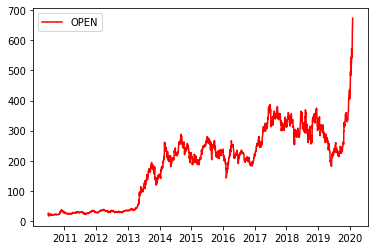

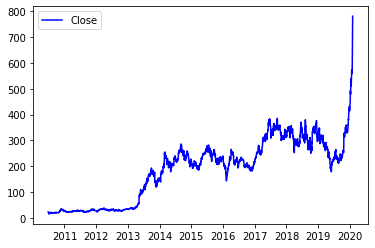

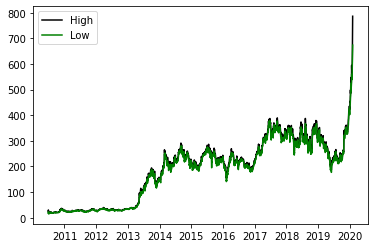

In [0]:
date=[datetime.strptime(d, '%Y-%m-%d').date() for d in data['Date'].astype('str').tolist()]

###EDA
###########
plt.figure()
plt.plot(date,data.Open,label='OPEN',c='red')
plt.legend(loc=2)
plt.show()
###########
plt.plot(date,data.Close,label='Close',c='blue')
plt.legend(loc=2)
plt.show()
###########
plt.plot(date,data.High,label='High',c='black')
plt.plot(date,data.Low,label='Low',c='green')
plt.legend(loc=2)
plt.show()

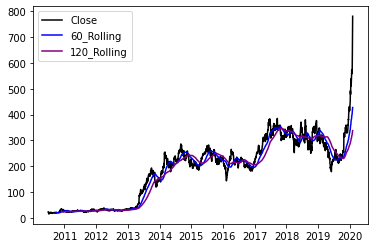

In [0]:
##### Moving Average
data['five_mo']=data['Close'].rolling(60).mean()####60 days
data['ten_mo']=data['Close'].rolling(120).mean()####120 days
plt.plot(date,data.Close,c='black',label='Close')
plt.plot(date,data.five_mo,c='blue',label='60_Rolling')
plt.plot(date,data.ten_mo,c='purple',label='120_Rolling')
plt.legend()
plt.show()

In [0]:
####### We use strategty from Pyalgotrade
!pip install pyalgotrade
from pyalgotrade import strategy
from pyalgotrade.barfeed import yahoofeed
from pyalgotrade.technical import ma

class MyStrategy(strategy.BacktestingStrategy):
    def __init__(self, feed, instrument):
        super(MyStrategy, self).__init__(feed)
        self.__sma = ma.SMA(feed[instrument].getCloseDataSeries(), 15) #We set a 15 days period
        self.__instrument = instrument

    def onBars(self, bars):
        bar = bars[self.__instrument]
        self.info("%s  %s" % (bar.getClose(), self.__sma[-1]))


feed = yahoofeed.Feed()
feed.addBarsFromCSV("orcl", "gdrive/My Drive/tesla.csv")

myStrategy = MyStrategy(feed, "orcl")
myStrategy.run()
#There is no value for the first 14 days since the period is 15 days



2010-06-29 00:00:00 strategy [INFO] 23.889999  None
2010-06-30 00:00:00 strategy [INFO] 23.83  None
2010-07-01 00:00:00 strategy [INFO] 21.959999  None
2010-07-02 00:00:00 strategy [INFO] 19.200001  None
2010-07-03 00:00:00 strategy [INFO] 16.110001  None
2010-07-04 00:00:00 strategy [INFO] 15.8  None
2010-07-08 00:00:00 strategy [INFO] 17.459999  None
2010-07-09 00:00:00 strategy [INFO] 17.4  None
2010-07-12 00:00:00 strategy [INFO] 17.049999  None
2010-07-13 00:00:00 strategy [INFO] 18.139999  None
2010-07-14 00:00:00 strategy [INFO] 19.84  None
2010-07-15 00:00:00 strategy [INFO] 19.889999  None
2010-07-16 00:00:00 strategy [INFO] 20.639999  None
2010-07-19 00:00:00 strategy [INFO] 21.91  None
2010-07-20 00:00:00 strategy [INFO] 20.299999  19.561332933333333
2010-07-21 00:00:00 strategy [INFO] 20.219999  19.316666266666665
2010-07-22 00:00:00 strategy [INFO] 21.0  19.1279996
2010-07-23 00:00:00 strategy [INFO] 21.290001  19.083333066666665
2010-07-26 00:00:00 strategy [INFO] 20.9500

In [0]:
###### We get SMA over the RSI over the closing prices
from pyalgotrade import strategy
from pyalgotrade.barfeed import yahoofeed
from pyalgotrade.technical import ma
from pyalgotrade.technical import rsi

class MyStrategy(strategy.BacktestingStrategy):
    def __init__(self, feed, instrument):
        super(MyStrategy, self).__init__(feed)
        self.__rsi = rsi.RSI(feed[instrument].getCloseDataSeries(), 14)
        self.__sma = ma.SMA(self.__rsi, 15)
        self.__instrument = instrument

    def onBars(self, bars):
        bar = bars[self.__instrument]
        self.info("%s  %s  %s" % (bar.getClose(), self.__rsi[-1], self.__sma[-1]))


feed = yahoofeed.Feed()
feed.addBarsFromCSV("orcl", "gdrive/My Drive/tesla.csv")

myStrategy = MyStrategy(feed, "orcl")
myStrategy.run()

2010-06-29 00:00:00 strategy [INFO] 23.889999  None  None
2010-06-30 00:00:00 strategy [INFO] 23.83  None  None
2010-07-01 00:00:00 strategy [INFO] 21.959999  None  None
2010-07-02 00:00:00 strategy [INFO] 19.200001  None  None
2010-07-03 00:00:00 strategy [INFO] 16.110001  None  None
2010-07-04 00:00:00 strategy [INFO] 15.8  None  None
2010-07-08 00:00:00 strategy [INFO] 17.459999  None  None
2010-07-09 00:00:00 strategy [INFO] 17.4  None  None
2010-07-12 00:00:00 strategy [INFO] 17.049999  None  None
2010-07-13 00:00:00 strategy [INFO] 18.139999  None  None
2010-07-14 00:00:00 strategy [INFO] 19.84  None  None
2010-07-15 00:00:00 strategy [INFO] 19.889999  None  None
2010-07-16 00:00:00 strategy [INFO] 20.639999  None  None
2010-07-19 00:00:00 strategy [INFO] 21.91  None  None
2010-07-20 00:00:00 strategy [INFO] 20.299999  39.20625375826819  None
2010-07-21 00:00:00 strategy [INFO] 20.219999  39.004187566149746  None
2010-07-22 00:00:00 strategy [INFO] 21.0  42.135595549033816  None


In [0]:
#############模拟

from pyalgotrade import strategy
from pyalgotrade.barfeed import yahoofeed
from pyalgotrade.technical import ma

class MyStrategy(strategy.BacktestingStrategy):
    def __init__(self, feed, instrument, smaPeriod):
        super(MyStrategy, self).__init__(feed, 10000)
        self.__position = None
        self.__instrument = instrument
        # We use the adjusted closing prices
        self.setUseAdjustedValues(True)
        self.__sma = ma.SMA(feed[instrument].getPriceDataSeries(), smaPeriod)

    def onEnterOk(self, position):
        execInfo = position.getEntryOrder().getExecutionInfo()
        self.info("buy at $%.2f" % (execInfo.getPrice()))

    def onEnterCanceled(self, position):
        self.__position = None

    def onExitOk(self, position):
        execInfo = position.getExitOrder().getExecutionInfo()
        self.info("sell at $%.2f" % (execInfo.getPrice()))
        self.__position = None

    def onExitCanceled(self, position):
        self.__position.exitMarket()

    def onBars(self, bars):
        if self.__sma[-1] is None:
            return

        bar = bars[self.__instrument]
        
        if self.__position is None:
            if bar.getPrice() > self.__sma[-1]:
                # We buy 10 stocks each time
                self.__position = self.enterLong(self.__instrument, 10, True)
        
        elif bar.getPrice() < self.__sma[-1] and not self.__position.exitActive():
            self.__position.exitMarket()

def run_strategy(smaPeriod):
    
    feed = yahoofeed.Feed()
    feed.addBarsFromCSV("orcl", "gdrive/My Drive/tesla.csv")

    
    myStrategy = MyStrategy(feed, "orcl", smaPeriod)
    myStrategy.run()
    print ("Finally we earn: $%.2f" % myStrategy.getBroker().getEquity())

run_strategy(15)#### Finally we earn $15549.70


2010-07-21 00:00:00 strategy [INFO] buy at $20.66
2010-08-02 00:00:00 strategy [INFO] sell at $20.50
2010-08-03 00:00:00 strategy [INFO] buy at $21.00
2010-08-06 00:00:00 strategy [INFO] sell at $20.10
2010-08-24 00:00:00 strategy [INFO] buy at $19.25
2010-09-20 00:00:00 strategy [INFO] sell at $20.67
2010-09-21 00:00:00 strategy [INFO] buy at $20.89
2010-09-23 00:00:00 strategy [INFO] sell at $19.89
2010-09-29 00:00:00 strategy [INFO] buy at $21.19
2010-10-01 00:00:00 strategy [INFO] sell at $20.69
2010-10-05 00:00:00 strategy [INFO] buy at $21.15
2010-10-07 00:00:00 strategy [INFO] sell at $20.57
2010-10-15 00:00:00 strategy [INFO] buy at $20.89
2010-10-18 00:00:00 strategy [INFO] sell at $20.52
2010-10-21 00:00:00 strategy [INFO] buy at $20.61
2010-12-06 00:00:00 strategy [INFO] sell at $31.35
2010-12-21 00:00:00 strategy [INFO] buy at $31.80
2010-12-27 00:00:00 strategy [INFO] sell at $28.02
2011-01-11 00:00:00 strategy [INFO] buy at $28.59
2011-01-12 00:00:00 strategy [INFO] sell 

Finally we earn: $15549.70


forcast price: (datetime.date(2019, 8, 12), 231.95883241981088, 229.00999500000003) (datetime.date(2019, 8, 13), 233.8853213064392, 235.0) (datetime.date(2019, 8, 14), 220.11248102281255, 219.61999500000002) (datetime.date(2019, 8, 15), 214.11193453154226, 215.63999900000002) (datetime.date(2019, 8, 16), 220.80887232744234, 219.940002) (datetime.date(2019, 8, 19), 225.2211206022957, 226.830002) (datetime.date(2019, 8, 20), 226.34277519434644, 225.86000099999998) (datetime.date(2019, 8, 21), 219.4372288828198, 220.830002) (datetime.date(2019, 8, 22), 221.3287816666976, 222.149994) (datetime.date(2019, 8, 23), 213.91016066603646, 211.399994) (datetime.date(2019, 8, 26), 213.04903686989118, 215.0) (datetime.date(2019, 8, 27), 215.35512430185736, 214.080002) (datetime.date(2019, 8, 28), 215.55055177033483, 215.58999599999999) (datetime.date(2019, 8, 29), 221.84443503473747, 221.710007) (datetime.date(2019, 8, 30), 227.9550505571764, 225.61000099999998) (datetime.date(2019, 9, 3), 227.38809

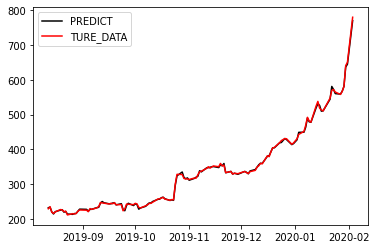

Residual： 0.08200146959020402 %


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
feature_data=data[['Close','Open','High','Low','Volume']]
x_data=feature_data[['Open','High','Low','Volume']]
y_data=feature_data['Close']

########95%
X_train,X_test,Y_train,Y_test=x_data.iloc[:int(0.95*data.shape[0]),:],x_data.iloc[int(0.95*data.shape[0]):,:],y_data.iloc[:int(0.95*data.shape[0])],y_data.iloc[int(0.95*data.shape[0]):]
model=LinearRegression()
model.fit(X_train,Y_train)
predict=model.predict(X_test)
print('forcast price:',*zip(date[int(0.95*len(date)):],predict,Y_test))

plt.figure()
plt.plot(date[int(0.95*len(date)):],predict,label='PREDICT',c='black')
plt.plot(date[int(0.95*len(date)):],Y_test,label='TURE_DATA',c='red')
plt.legend()
plt.show()

print('Residual：',-(predict.mean()-Y_test.mean())/Y_test.mean()*100,'%')
